# ASSIGNMENT - 7
# Implementation of Regression Techniques such as Linear Regression & Logistic Regression and Evaluation of Their Performance

In [11]:
# Step 1: Import Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_squared_log_error, accuracy_score, confusion_matrix, classification_report

In [4]:
# Step 2: Load and Explore Dataset

data = pd.read_csv("wine-clustering.csv")

print("First 5 rows of dataset:")
print(data.head())
print("\nDataset Information:")
print(data.info())

# Step 3: Preprocessing

# Select only numeric columns for regression
numeric_data = data.select_dtypes(include=[np.number]).dropna()
# Standardize the data
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(numeric_data), columns=numeric_data.columns)

First 5 rows of dataset:
   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.1

In [6]:
# Step 4: Linear Regression Implementation

print("\n--- Linear Regression ---")

# Predict the first column using the rest as features
target_col = scaled_data.columns[0]
X = scaled_data.drop(columns=[target_col])
y = scaled_data[target_col]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict
y_pred = lin_reg.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE (Linear Regression): {mse:.4f}")
print(f"RMSE (Linear Regression): {rmse:.4f}")

# Optional MSLE (only valid if target values > 0)
if np.all(y_test > 0) and np.all(y_pred > 0):
    msle = mean_squared_log_error(y_test, y_pred)
    print(f"MSLE (Linear Regression): {msle:.4f}")
else:
    print("MSLE not applicable due to negative or zero values.")


--- Linear Regression ---
MSE (Linear Regression): 0.2834
RMSE (Linear Regression): 0.5323
MSLE not applicable due to negative or zero values.


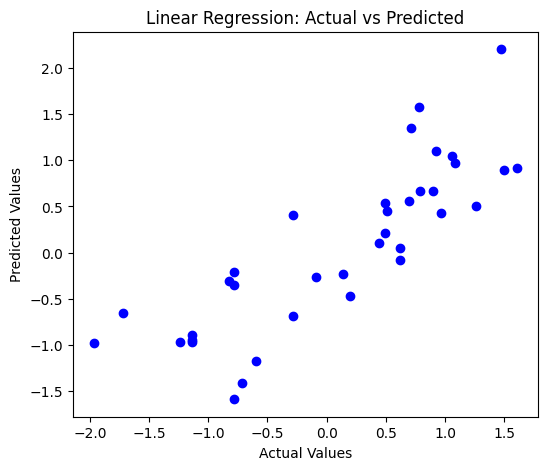

In [7]:
# Step 5: Visualization for Linear Regression

plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

In [12]:
# Step 6: Logistic Regression Implementation

print("\n--- Logistic Regression ---")

# Create a binary target.
y_log = (y > y.mean()).astype(int)

# Split data
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Train model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_log, y_train_log)

# Predict
y_pred_log = log_reg.predict(X_test_log)

# Evaluate
acc = accuracy_score(y_test_log, y_pred_log)
print(f"Accuracy (Logistic Regression): {acc:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test_log, y_pred_log))
print("Classification Report:\n", classification_report(y_test_log, y_pred_log))


--- Logistic Regression ---
Accuracy (Logistic Regression): 0.8333
Confusion Matrix:
 [[13  2]
 [ 4 17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.87      0.81        15
           1       0.89      0.81      0.85        21

    accuracy                           0.83        36
   macro avg       0.83      0.84      0.83        36
weighted avg       0.84      0.83      0.83        36



In [9]:
# Step 7: Regularization Demonstration

print("\n--- Regularization Comparison (L1 & L2) ---")

ridge = Ridge(alpha=0.5)
lasso = Lasso(alpha=0.01)

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

ridge_pred = ridge.predict(X_test)
lasso_pred = lasso.predict(X_test)

print(f"Ridge (L2) RMSE: {np.sqrt(mean_squared_error(y_test, ridge_pred)):.4f}")
print(f"Lasso (L1) RMSE: {np.sqrt(mean_squared_error(y_test, lasso_pred)):.4f}")



--- Regularization Comparison (L1 & L2) ---
Ridge (L2) RMSE: 0.5318
Lasso (L1) RMSE: 0.5254


In [10]:
# Step 8: Compare MSE, RMSE, MSLE

print("\n--- Comparison of Error Metrics ---")
print("MSE  (Mean Squared Error): Measures average squared difference between predictions and actual values.")
print("RMSE (Root MSE): Same as MSE but in original units, easier to interpret.")
print("MSLE (Mean Squared Log Error): Penalizes underestimation more than overestimation, good for exponential data.")


# Step 9: Conclusion

print("\nConclusion:")
print("1. Linear Regression effectively models continuous relationships between variables.")
print("2. Logistic Regression is suitable for binary classification tasks.")
print("3. Regularization (L1, L2) helps prevent overfitting by penalizing large coefficients.")
print("4. Evaluation metrics such as MSE, RMSE, and MSLE quantify prediction accuracy and model stability.")


--- Comparison of Error Metrics ---
MSE  (Mean Squared Error): Measures average squared difference between predictions and actual values.
RMSE (Root MSE): Same as MSE but in original units, easier to interpret.
MSLE (Mean Squared Log Error): Penalizes underestimation more than overestimation, good for exponential data.

Conclusion:
1. Linear Regression effectively models continuous relationships between variables.
2. Logistic Regression is suitable for binary classification tasks.
3. Regularization (L1, L2) helps prevent overfitting by penalizing large coefficients.
4. Evaluation metrics such as MSE, RMSE, and MSLE quantify prediction accuracy and model stability.
